## Dynamic Programming

In [21]:
from functools import wraps
from functools import lru_cache
from collections import defaultdict
from collections import Counter
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [22]:
price = defaultdict(int)
for index, value in enumerate(original_price):
    price[index + 1] = value

## Python 装饰器的应用

In [23]:
def parse_solution(n):
    left_split, right_split = solution[n]
    if right_split == 0:
        return [left_split]
    return parse_solution(left_split) + parse_solution(right_split)

In [24]:
def memo(f):
    
    already_computed = {}
    
    @wraps(f)
    def _wrap(n):
        """
            Looking at whether function was already calculated
        """
        res = None
        if already_computed.get(n) != None:
            res = already_computed[n]
        else:
            res = f(n)
            already_computed[n] = res
        return res
    return _wrap

In [25]:
solution = {}

@memo
# @get_call_times
def r(n):
    """
    Args: n is the iron length
    return: the maximum revenue
    """
    
    max_price, max_split = max(
        [(price[n], 0)] + [(r(i) + r(n - i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (n - max_split, max_split)
    return max_price

In [29]:
r(15)

45

In [27]:
parse_solution(15)

[11, 2, 2]

## Python装饰器的练习

### Practice 1

In [96]:
def example(f, arg):
    return f(arg)

def add_ten(arg):
    return arg + 10

def mul_ten(arg):
    return arg * 10

In [68]:
operation = [add_ten, mul_ten]
for i in operation:
    print(example(i, 5))

15
50


### Practice 2

In [73]:
called_time = defaultdict(int)

def get_call_times(f):
    result = f()
    print("funciton: {} called once!".format(f.__name__))
    called_time[f.__name__] += 1
    return result

def testDerector(): print("this is from derector!")

In [74]:
get_call_times(testDerector)

this is from derector!
funciton: testDerector called once!


### Practice 3

In [97]:
called_time = defaultdict(int)

def get_call_times(f):
    
    def wrap(n):
        result = f(n)
        print("I can Count")
        called_time[(f.__name__, n)] += 1
        return result
    return wrap

In [98]:
test_function = get_call_times(add_ten)

In [99]:
test_function(4), called_time

i am add
I can Count


(14, defaultdict(int, {('add_ten', 4): 1}))

### Practice 4

In [17]:
called_time = defaultdict(int)

def get_call_times(f):
    @wraps(f)
    def wrap(n):
        result = f(n)
        called_time[(f.__name__, n)] += 1
        return result
    return wrap

In [103]:
test_function = get_call_times(add_ten)
test_function(4), called_time

i am add
I can Count


(14, defaultdict(int, {('add_ten', 4): 1}))

In [187]:
@get_call_times
def add_ten(arg):
    return arg + 10

In [106]:
add_ten(12)

I can Count


22

## Edit Distance

In [33]:
solution = {}
@lru_cache()
def edit_distance(string1, string2):
    if len(string1) == 0:
        return len(string2)
    if len(string2) == 0:
        return len(string1)
    tail_s1 = string1[-1]
    tail_s2 = string2[-1]
    candidates = [
        (edit_distance(string1[:-1], string2) + 1, 'DEL {}'.format(tail_s1)),   # string1 delete tail character
        (edit_distance(string1, string2[:-1]) + 1, 'ADD {}'.format(tail_s2)), # string1 add tail character of string2
    ]
    
    if tail_s1 == tail_s2:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 0, '')
    else:
        both_forward = (edit_distance(string1[:-1], string2[:-1]) + 1, 'SUB {} => {}'.format(tail_s1, tail_s2))
        
    candidates.append(both_forward)
    min_distance, operand = min(candidates, key=lambda x:x[0])
    solution[(string1, string2)] = operand
    return min_distance;

In [35]:
def parse_edit_solution(string1, string2):
    if string1 == "" and string2 == "":
        return []
    if len(solution[(string1, string2)]) == 0 or solution[(string1, string2)].startswith("SUB"):
        return [solution[(string1, string2)]] + parse_edit_solution(string1[:-1], string2[:-1])
    elif solution[(string1, string2)].startswith("ADD"):
        return [solution[(string1, string2)]] + parse_edit_solution(string1, string2[:-1])
    elif solution[(string1, string2)].startswith("DEL"):
        return [solution[(string1, string2)]] + parse_edit_solution(string1[:-1], string2)

In [34]:
edit_distance('ABDE', 'ABCCEF')

3

In [36]:
parse_edit_solution('ABDE', 'ABCCEF')

['ADD F', '', 'ADD C', 'SUB D => C', '', '']

## 1 Person search

In [5]:
import matplotlib.pyplot as plt
import random
import math
%matplotlib inline

In [32]:
latitudes = [random.randint(-100,100) for _ in range(20)]
longitude = [random.randint(-100,100) for _ in range(20)]

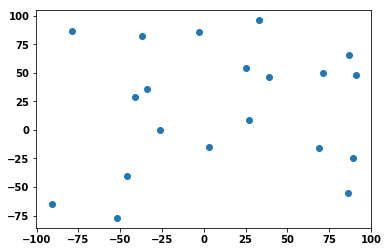

In [33]:
plt.scatter(latitudes, longitude)

In [40]:
def geo_distance(origin, destination):
    lat1, lon1 = origin
    lat2, lon2 = destination
    distance = (lat2 - lat1) ** 2 + (lon2 - lon1) ** 2
    return math.sqrt(distance)

In [41]:
import math
math.sqrt(5)

2.23606797749979